[Paper Reference](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i for i, s in enumerate(chars, 1)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [5]:
# Building datasets
block_size = 3
X, Y = [], []
for word in words[:5]:
    # print(word)`
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X) # examples
Y = torch.tensor(Y) # Labels

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

`X` are examples, and the `Y` are the labels

In [7]:
C = torch.rand(27, 2) # lookup table

In [8]:
C[5]

tensor([0.2435, 0.2527])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # converting, the number to one_hot, then multiply with the Matrix to get the value

tensor([0.2435, 0.2527])

In [10]:
emb = C[X] # mapping to a look up table
emb.shape

torch.Size([32, 3, 2])

In [11]:
W1 = torch.randn((6, 100)) # 3 x 2 = 6
b1 = torch.randn(100)

In [12]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [13]:
[emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]]

[tensor([[0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.2435, 0.2527],
         [0.8217, 0.4129],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.1671, 0.2001],
         [0.2359, 0.5004],
         [0.6399, 0.0992],
         [0.0318, 0.1819],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.2062, 0.0207],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.6399, 0.0992],
         [0.2089, 0.8883],
         [0.2062, 0.0207],
         [0.4552, 0.9662],
         [0.2435, 0.2527],
         [0.2359, 0.5004],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.2089, 0.8883],
         [0.1671, 0.2001],
         [0.0531, 0.7516],
         [0.9763, 0.3148]]),
 tensor([[0.3060, 0.6034],
         [0.3060, 0.6034],
         [0.2435, 0.2527],
         [0.8217, 0.4129],
         [0.8217, 0.4129],

In [14]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

[Resume from here](https://youtu.be/TCH_1BHY58I?t=1430)

In [15]:
a = torch.arange(18)

In [16]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [17]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

[Reference on view](https://blog.ezyang.com/2019/05/pytorch-internals/)

In [18]:
emb.view(32, 6).shape

torch.Size([32, 6])

In [19]:
emb.shape

torch.Size([32, 3, 2])

### Understanding `torch.tensor.view`

In [20]:
tensor = torch.tensor([[[1, 2], [3, 4], [5, 6]],
                       [[7, 8], [9, 10], [11, 12]],
                       [[13, 14], [15, 16], [17, 18]]])
tensor.shape

torch.Size([3, 3, 2])

In [21]:
tensor.view(9, 1, 2)

tensor([[[ 1,  2]],

        [[ 3,  4]],

        [[ 5,  6]],

        [[ 7,  8]],

        [[ 9, 10]],

        [[11, 12]],

        [[13, 14]],

        [[15, 16]],

        [[17, 18]]])

In [22]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [23]:
h.shape

torch.Size([32, 100])

In [24]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
W2.shape

torch.Size([100, 27])

In [26]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [27]:
counts = logits.exp()

In [28]:
prob = counts / counts.sum(1, keepdims=True)

In [29]:
prob.shape

torch.Size([32, 27])

In [30]:
prob[torch.arange(32), Y]

tensor([9.4628e-04, 2.5494e-08, 7.0332e-09, 8.7937e-03, 3.3744e-04, 2.4905e-10,
        7.7023e-05, 6.2049e-01, 2.3749e-09, 2.8185e-02, 9.0239e-05, 5.4558e-06,
        4.7673e-01, 3.6722e-07, 7.2275e-03, 2.2233e-07, 1.8496e-01, 1.1119e-12,
        6.2739e-01, 2.7038e-05, 6.7256e-05, 1.0674e-02, 1.4107e-07, 6.5348e-01,
        1.6100e-04, 1.1948e-10, 8.6177e-11, 7.0044e-01, 3.7482e-04, 1.2627e-05,
        2.4741e-04, 9.5162e-06])

In [31]:
loss = -prob[torch.arange(32), Y].log().mean()

[Resume from here](https://youtu.be/TCH_1BHY58I?t=1947)

In [32]:
# Building datasets
block_size = 3
X, Y = [], []
for word in words:
    # print(word)`
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X) # examples
Y = torch.tensor(Y) # Labels

In [33]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [34]:
for p in parameters:
    p.requires_grad = True 

1. because of the cross_entropy, the forward pass is efficient
2. The backward pass becomes efficient, because the maths is compressed into a kernel
3. while handling large numbers it eliminates the max number to get a good exponential

In [35]:
for _ in range(1000):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    for p in parameters:
        p.grad = None
    
    loss.backward()
    for p in parameters:
        p.data += - 0.1* p.grad

19.505229949951172
17.084495544433594
15.776532173156738
14.833337783813477
14.002595901489258
13.253252029418945
12.579911231994629
11.9830961227417
11.470490455627441
11.051854133605957
10.709585189819336
10.407631874084473
10.127808570861816
9.864364624023438
9.61450481414795
9.37644100189209
9.148946762084961
8.931112289428711
8.722232818603516
8.52175235748291


KeyboardInterrupt: 

In [36]:
loss

tensor(8.5218, grad_fn=<NllLossBackward0>)

In [37]:
torch.randint(0, X.shape[0], (32,))

tensor([189808,  16056, 103872,  77534, 210899, 108664, 205913, 139999,  47369,
        151972,  82164, 103018, 112431, 214058, 116825, 146772, 198382, 147610,
        176622, 138627, 135386, 170119, 115796,  95074,   5220, 214959, 193105,
        104669,  68038,  77026, 161292, 180220])

In [38]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [39]:
for p in parameters:
    p.requires_grad = True 

In [40]:
lre = torch.linspace(-2, 0, 1000)
lrs = 10**lre

In [41]:
lri = []
lossi = []

for i in range(1000):
    # minibatching
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr* p.grad

    lri.append(lre[i])
    lossi.append(loss.item())

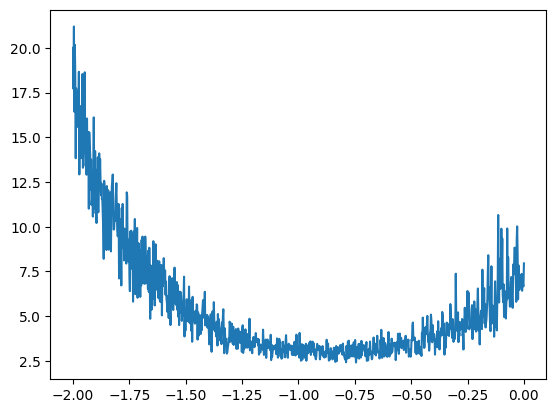

In [42]:
plt.plot(lri, lossi)

In [43]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

8.015970230102539

In [44]:
sum(p.nelement() for p in parameters)

3481

In [45]:
#train, dev/validation , test split --> 80,  10,  10

[Resume from here](https://youtu.be/TCH_1BHY58I?t=3340)

## Understanding Splitting data and training it.

In [46]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random

random.seed(4)
random.shuffle(words)

n1 = int(0.8*len(words)) #80% of words
n2 = int(0.9*len(words)) #90% of words

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182359, 3]) torch.Size([182359])
torch.Size([22793, 3]) torch.Size([22793])
torch.Size([22994, 3]) torch.Size([22994])


In [47]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [48]:
for p in parameters:
    p.requires_grad = True 

In [49]:
#training on training dataset

for i in range(10000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()

    for p in parameters:
        p.data += -0.1* p.grad

In [50]:
loss.item()

2.854398012161255

In [51]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.4867188930511475

In [52]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.4853007793426514

In [53]:
sum(p.nelement() for p in parameters)

3481

## Scaling up the size of the Neural Network so that it can learn

In [132]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2,

In [133]:
sum(p.nelement() for p in parameters)

10281

In [134]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [135]:
for p in parameters:
    p.requires_grad = True 

In [149]:
#training on training dataset

lri = []
lossi = []
stepi = []

for i in range(10000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
        
    
    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data += -lr* p.grad
    stepi.append(i)
    lossi.append(loss.item())

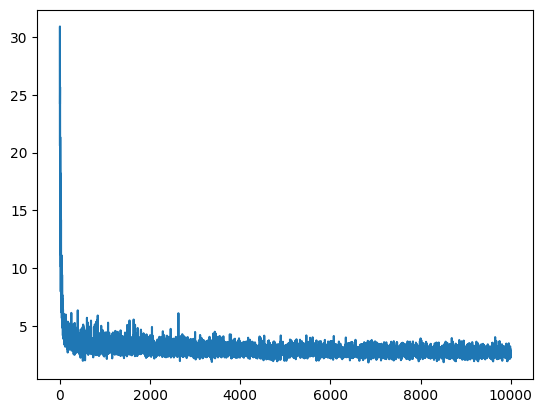

In [137]:
plt.plot(stepi, lossi)

In [150]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.393057346343994

In [151]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.404560089111328

[Resume here](https://youtu.be/TCH_1BHY58I?t=3891)

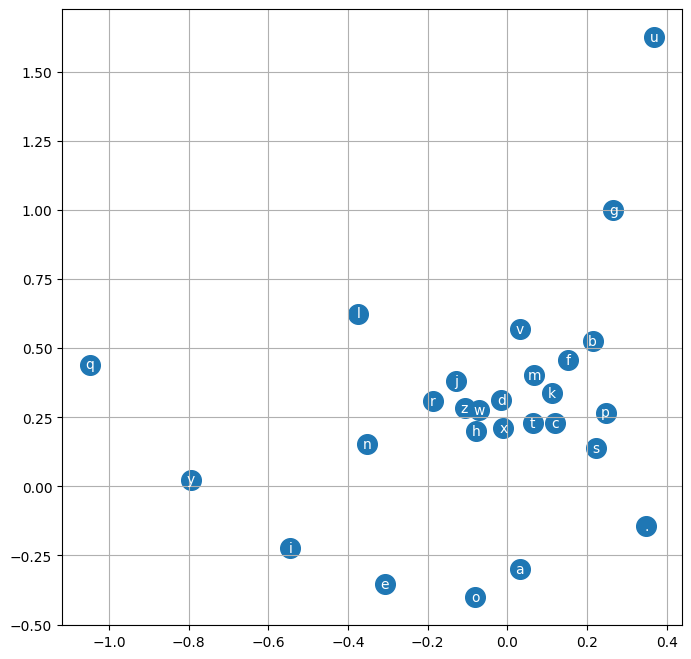

In [152]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

# Updating the dimensions of the neural network

In [154]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # updating the dimensions of the embedding
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2,

In [155]:
sum(p.nelement() for p in parameters)

11897

In [156]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [157]:
for p in parameters:
    p.requires_grad = True 

In [160]:
lri = []
lossi = []
stepi = []

In [186]:
#training on training dataset

for i in range(200000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
        
    
    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

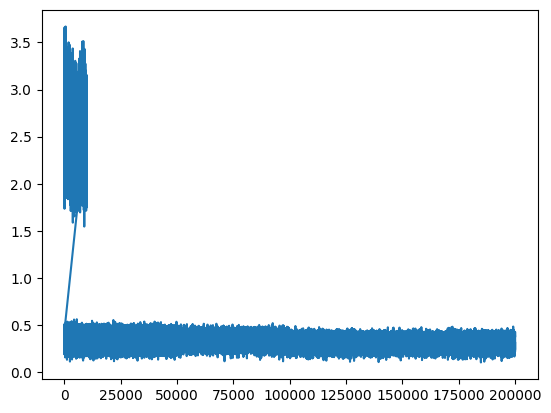

In [179]:
plt.plot(stepi, lossi)

In [187]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.0509419441223145

In [188]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.119145393371582

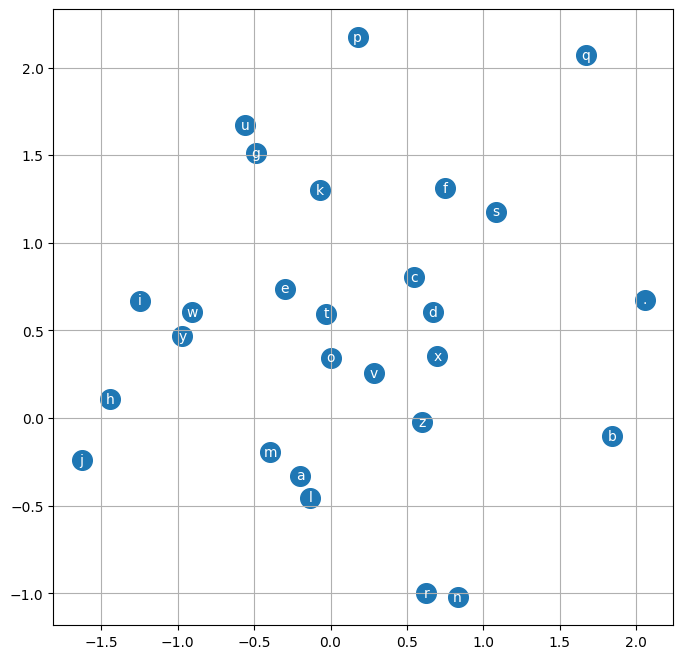

In [190]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

# Sampling data

In [192]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
amorie.
khyrmin.
reh.
cassanden.
jazheen.
delynn.
jareen.
nellara.
chriiv.
